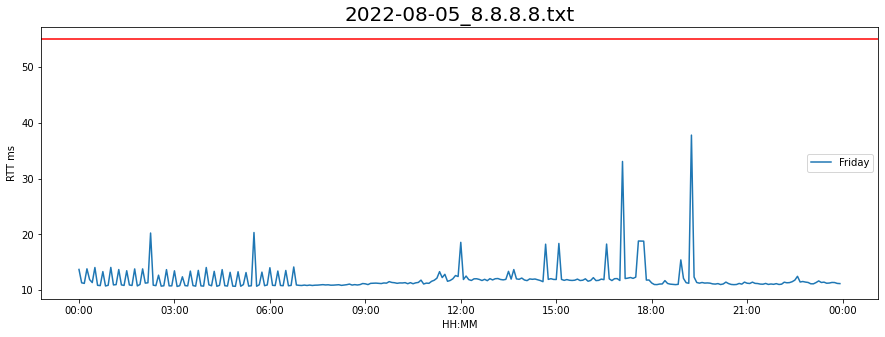

In [39]:
### pings data analysis ###
# ver 1.0
# Author: Omar H. Nina Flores
# Date: 2022-08-19

# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime

# select the original file 
file_name = '2022-08-05_8.8.8.8.txt'

# Defining the custom header
header = 'date time size bytes from ip icmp ttl rtt ms\n'

# day name
day_name = datetime.strptime(file_name[0:10], "%Y-%m-%d").strftime("%A")

# Threshold
# go to omardata.com to know why is the value
threshold = 55

# Delete first line and add header
with open(file_name, 'r+') as fp:
    # read an store all lines into list
    lines = fp.readlines()
    # delete first element from list
    lines.pop(0)
    # add header to list
    lines.insert(0, header)
    # move file pointer to the beginning of a file
    fp.seek(0)
    # truncate the file
    fp.truncate()
    # start writing lines
    fp.writelines(lines)
    
### Import log ping file ###

# Make sure head is: date time size bytes from ip icmp ttl rtt ms
pings = pd.read_csv(file_name, sep=' ', engine='python')
### Formating datetime and rtt time ###
pings['DateTime'] = pings.date + ' ' + pings.time.str.rstrip(":")
pings.DateTime = pings.DateTime.astype('datetime64[ns]')
pings.rtt = pings.rtt.str.strip("time=")

# Considering 2000 [ms] as lost packet
pings.rtt = pings.rtt.fillna(2000)
pings.rtt = pings.rtt.astype('float')

### New df that only have DateTime and rtt ###
pings_v2 = pings[['DateTime', 'rtt']].copy()
pings_v2 = pings_v2.set_index(pings_v2.DateTime)

### Getting samples every 5 ### minutes
pings5min = pings_v2.resample('5T').mean()

### To zoom-in unccomment the next line ###
#pings5min = pings5min.loc['2022-01-25 02:00:00':'2022-01-25 02:30:00']

### Re numerate index 0, 1, 2, ... ###
pings5min = pings5min.reset_index(drop=False)

### Create figure and plot ### space
fig, ax = plt.subplots(figsize=(15, 5))

### Add x-axis and y-axis ###
ax.plot(pings5min.DateTime, pings5min.rtt, label=day_name)
plt.title(file_name, fontdict={'fontsize': 20})
plt.xlabel('HH:MM')
plt.ylabel('RTT ms')

### Define the date format ###
date_form = DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_form)
plt.legend()

### Get the graph ###
plt.axhline(y=threshold, color='r', linestyle='-')
plt.savefig(file_name + ".png", dpi=300)
plt.show()